In [2]:
#!pip install -U torch torchvision
#!pip install git+https://github.com/facebookresearch/fvcore.git
#!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
#!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
#!pip install -e detectron2_repo

# Set config

In [3]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
import os
import matplotlib.pyplot as plt

dir_path = "/data_science/data_science/data/v1/idcard/segmentation"

# set config
cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"
cfg.merge_from_file("detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
# cfg.DATASETS.TRAIN = (train_name,)
# cfg.DATASETS.TEST = (test_name,)   
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.CHECKPOINT_PERIOD = 1000
cfg.SOLVER.BASE_LR = 0.0001
cfg.SOLVER.MAX_ITER = 5000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 16
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.OUTPUT_DIR = f"{dir_path}/idcard_segmentation_06062022"
cfg.INPUT.MASK_FORMAT = 'bitmask'
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2


predictor = DefaultPredictor(cfg)

# Predict single image

In [138]:
import cv2
#dir_path = "/data_science/data_science/data/v1/idcard/segmentation"
#img = cv2.imread(f"{dir_path}/photo_2022-06-07_09-59-26.jpg")
img = '/home/jovyan/work/projects/wkidcard/utils/align_idcard/align_by_segmentation/IMG_2014_new.jpg'
img = cv2.imread(img)
img = cv2.resize(img,(640,640))
outputs = predictor(img)
outputs

{'instances': Instances(num_instances=4, image_height=640, image_width=640, fields=[pred_boxes: Boxes(tensor([[ 24.5935,  29.1323, 608.5928, 586.2521],
         [182.2544,  49.5440, 597.8190, 343.7454],
         [ 72.0155, 384.5740, 394.0483, 591.9824],
         [ 42.0750, 263.6282, 471.0306, 599.1563]])), scores: tensor([0.9996, 0.5463, 0.4154, 0.2981]), pred_classes: tensor([0, 0, 0, 0]), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],
 
         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, Fals

In [139]:
import numpy as np

# === Extract (only) the mask and box of Hobbes === #
# Find the index of the class we are interested in
# First, convert to numpy array to allow direct indexing
class_ids = np.array(outputs["instances"].pred_classes.cpu())
class_index = np.where(class_ids == 0)  # Find index where class ID is 16
# Use that index to index the array of masks and boxes
mask_tensor = outputs["instances"].pred_masks[class_index]
print(mask_tensor.shape)
mask_tensor

torch.Size([4, 640, 640])


tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [

In [140]:
# Convert tensor to numpy array
# hobbes_mask = mask_tensor.cpu()
hobbes_mask = mask_tensor
print("Before:", type(hobbes_mask))
print(hobbes_mask.shape)
hobbes_mask = np.array(hobbes_mask[0])
print("After:", type(hobbes_mask))
print(hobbes_mask.shape)

Before: <class 'torch.Tensor'>
torch.Size([4, 640, 640])
After: <class 'numpy.ndarray'>
(640, 640)


In [141]:
hobbes_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [142]:
# Create blank black background
# The "True" pixels will be converted to white and copied onto the black background
background = np.zeros(hobbes_mask.shape)
background.shape

(640, 640)

In [143]:
# Add white pixels where mask values are True
bin_mask = np.where(hobbes_mask, 255, background).astype(np.uint8)
print(bin_mask.shape)
bin_mask

(640, 640)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

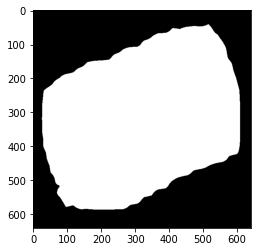

In [144]:

# Show the resulting binary mask
plt.imshow(cv2.cvtColor(bin_mask, cv2.COLOR_BGR2RGB))
# cv2.imwrite("./hong_origin.jpg", img)

BG shape: (640, 640, 3)
Mask shape: (640, 640, 3)


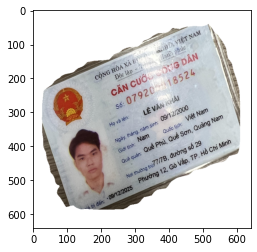

In [145]:
# === Extract pixels using mask === #

# Create blank background
# bg = np.zeros(img.shape)
bg = np.ones(img.shape)*255
print("BG shape:", bg.shape)

# Create mask
mask = np.stack([hobbes_mask, hobbes_mask, hobbes_mask], axis=2)
print("Mask shape:", mask.shape)

# Copy color pixels from the original color image where mask is set
foreground = np.where(mask, img, bg).astype(np.uint8)

# Check out the result
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))

In [146]:
foreground

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [147]:
img_canny

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

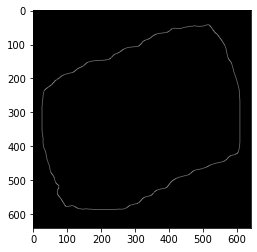

In [148]:
def canny_edge_detection(img, blur_ksize=5, threshold1=100, threshold2=200):
    """
    image_path: link to image
    blur_ksize: Gaussian kernel size
    threshold1: min threshold 
    threshold2: max threshold
    """
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(img,(blur_ksize,blur_ksize),0)

    img_canny = cv2.Canny(img_gaussian,threshold1,threshold2)

    return img_canny
    
img_canny = canny_edge_detection(bin_mask, 25, 50, 100)

plt.imshow(cv2.cvtColor(img_canny, cv2.COLOR_BGR2RGB))

In [153]:
row_index =[]
col_index =[]
for row in range(img_canny.shape[0]):
    for col in range(img_canny.shape[1]):
        if img_canny[row][col] ==255:
            col_index.append(col)
            row_index.append(row)

In [154]:
img_canny

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [156]:
top_left

[43, 26]

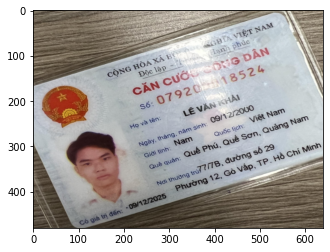

In [157]:
x_min = min(row_index)
x_max = max(row_index)
y_min = min(col_index)
y_max = max(col_index)
top_left = [x_min,y_min]
top_right = [x_max,y_min]
bottom_right = [x_max,y_max]
bottom_left = [x_min,y_max]
source_points = np.float32([
          top_left, top_right , bottom_right, bottom_left])
#(640,480) la size hinh sau khi algin
def perspective_transform(image, source_points):
    dest_points = np.float32([[0,0], [640,0], [640,480], [0,480]])
    M = cv2.getPerspectiveTransform(source_points, dest_points)
    dst = cv2.warpPerspective(image, M, (640, 480))
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    return dst
new_img = perspective_transform(img,source_points)
plt.imshow(new_img)

In [132]:
source_points

array([[  3.,  33.],
       [635.,  33.],
       [635., 613.],
       [635.,  33.]], dtype=float32)

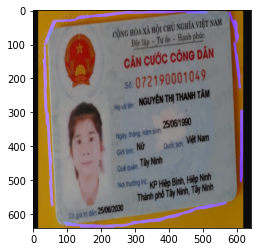

In [106]:
gray = img_canny

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
# Draw the lines on the  iamage
lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
plt.imshow(cv2.cvtColor(lines_edges, cv2.COLOR_BGR2RGB))

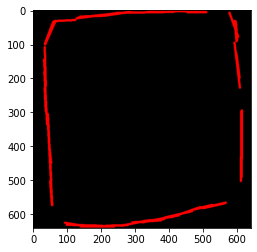

In [108]:
plt.imshow(line_image)

594.0 36.0
418.0 607.0
559.0 567.0
48.0 67.0


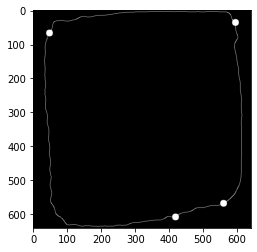

In [109]:
corners = cv2.goodFeaturesToTrack(img_canny,4,0.01,100,blockSize = 3)

for corner in corners:
    x,y = corner.ravel()
    print(x, y)
    cv2.circle(img_canny,(int(x),int(y)), 10, (255,255,255), -1)
    
plt.imshow(cv2.cvtColor(img_canny, cv2.COLOR_BGR2RGB))